# Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset = pd.read_excel("drive/My Drive/datasets_ont_lab/DataSet_USA_3k_5k.xlsx")

# Understanding the dataset


In [5]:
dataset.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,Source,Destination,No. Spans,Total Distance(m),Number of ON channels
0,0.000000,0.000000,0.000096,0.000096,0.000096,0.000000,0.000096,0.0,0.000096,0.0,...,0.000000,0.000000,26.391513,0.000000,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26
1,0.000000,0.000096,0.000000,0.000096,0.000000,0.000096,0.000000,0.0,0.000000,0.0,...,0.000000,25.764675,0.000000,0.000000,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26
2,0.000000,0.000000,0.000000,0.000096,0.000000,0.000000,0.000000,0.0,0.000096,0.0,...,0.000000,0.000000,0.000000,24.616361,24.297057,trxHouston0,trxJacksonville58,23,2050305.0,26
3,0.000096,0.000096,0.000095,0.000095,0.000096,0.000000,0.000000,0.0,0.000096,0.0,...,22.810189,0.000000,0.000000,0.000000,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26
4,0.000000,0.000000,0.000096,0.000000,0.000096,0.000000,0.000000,0.0,0.000096,0.0,...,21.211149,21.131602,21.349516,22.572032,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26


we can see that there are two columns of object datatype, so we are looking now for columns with object datatypes

In [6]:
for x in dataset.columns:
  if dataset[x].dtype not in ['float64', 'int64']:
    print(f'{x} : {dataset[x].dtype}')

Source : object
Destination : object


obtaining all columns of datatypes other than object

In [7]:
columns_ = [x for x in dataset.columns if dataset[x].dtype not in ['object']]

In [8]:
print(columns_)

['Power_1', 'Power_2', 'Power_3', 'Power_4', 'Power_5', 'Power_6', 'Power_7', 'Power_8', 'Power_9', 'Power_10', 'Power_11', 'Power_12', 'Power_13', 'Power_14', 'Power_15', 'Power_16', 'Power_17', 'Power_18', 'Power_19', 'Power_20', 'Power_21', 'Power_22', 'Power_23', 'Power_24', 'Power_25', 'Power_26', 'Power_27', 'Power_28', 'Power_29', 'Power_30', 'Power_31', 'Power_32', 'Power_33', 'Power_34', 'Power_35', 'Power_36', 'Power_37', 'Power_38', 'Power_39', 'Power_40', 'Power_41', 'Power_42', 'Power_43', 'Power_44', 'Power_45', 'Power_46', 'Power_47', 'Power_48', 'Power_49', 'Power_50', 'Power_51', 'Power_52', 'Power_53', 'Power_54', 'Power_55', 'Power_56', 'Power_57', 'Power_58', 'Power_59', 'Power_60', 'Power_61', 'Power_62', 'Power_63', 'Power_64', 'Power_65', 'Power_66', 'Power_67', 'Power_68', 'Power_69', 'Power_70', 'Power_71', 'Power_72', 'Power_73', 'Power_74', 'Power_75', 'Power_76', 'NLI_1', 'NLI_2', 'NLI_3', 'NLI_4', 'NLI_5', 'NLI_6', 'NLI_7', 'NLI_8', 'NLI_9', 'NLI_10', 'NLI_

Correlation Matrix Heatmap

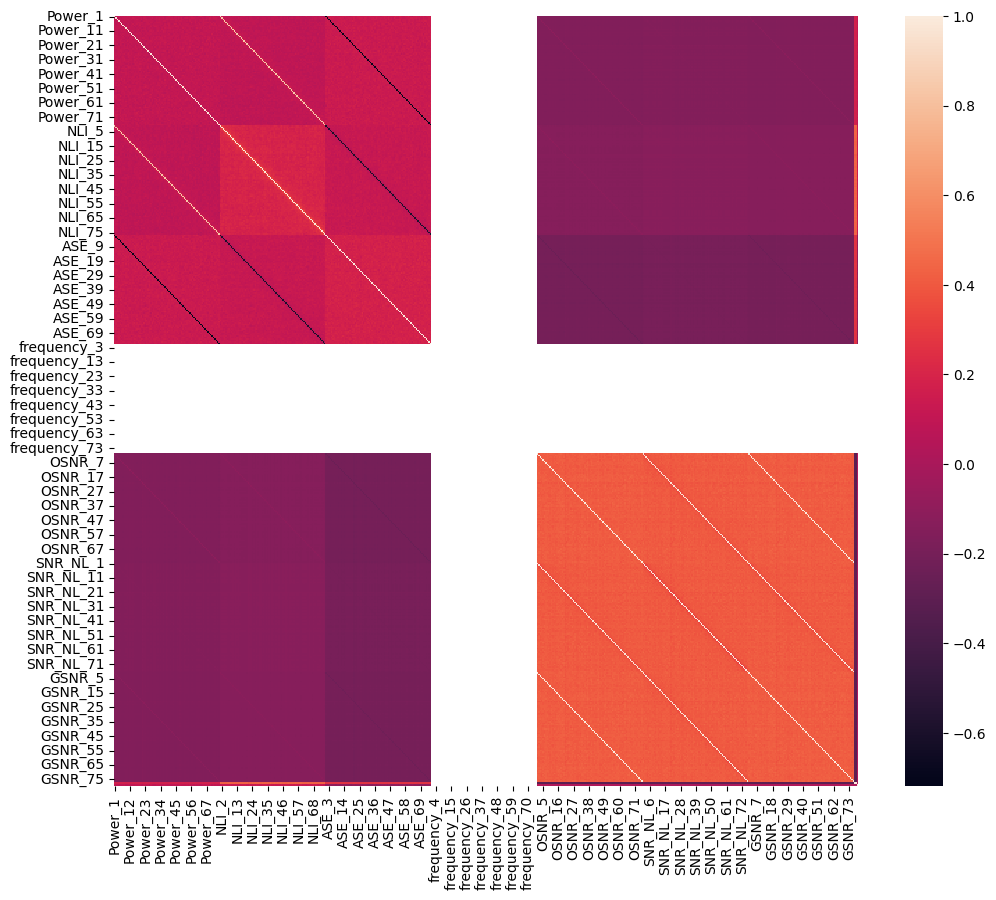

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset[columns_].corr())
plt.show()

We can clearly see from the above heatmap plot that the frequency attributes have almost zero correlation with other attributes.

# Data preprocessing

We will be using Channel 1.


In [10]:
channel_1_columns = ['Power_1', 'NLI_1', 'ASE_1', 'frequency_1', 'Total Distance(m)', 'No. Spans', 'GSNR_1']
data = dataset[channel_1_columns]

checking first few rows

In [11]:
data.head()

,Power_1,NLI_1,ASE_1,frequency_1,Total Distance(m),No. Spans,GSNR_1
0,0.000000,0.000000,0.000100,191300000000000,2050305.0,23,0.000000
1,0.000000,0.000000,0.000100,191300000000000,2050305.0,23,0.000000
2,0.000000,0.000000,0.000100,191300000000000,2050305.0,23,0.000000
3,0.000096,0.000002,0.000003,191300000000000,2050305.0,23,22.651367
4,0.000000,0.000000,0.000100,191300000000000,2050305.0,23,0.000000


checking the datatypes of columns

In [12]:
data.dtypes

Power_1              float64
NLI_1                float64
ASE_1                float64
frequency_1            int64
Total Distance(m)    float64
No. Spans              int64
GSNR_1               float64
dtype: object

checking for any missing values

In [13]:
data.isnull().sum()

Power_1              0
NLI_1                0
ASE_1                0
frequency_1          0
Total Distance(m)    0
No. Spans            0
GSNR_1               0
dtype: int64

visualizing the data

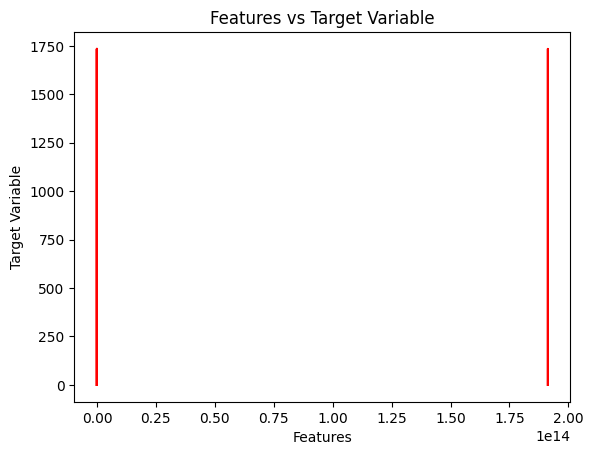

In [14]:
plt.plot(data.iloc[:, :-1].values, data.iloc[:, -1].values, color = 'red')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.title('Features vs Target Variable')
plt.show()

we can see that the data is non-linear

# Splitting the dataset into training set and test set

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [16]:
print(f'X size = {X.shape}\ny size = {y.shape}')

X size = (36000, 6)
y size = (36000,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (28800, 6), (28800,)
Validation set shape: (3600, 6), (3600,)
Test set shape: (3600, 6), (3600,)


# Applying feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

# Implementing pre-trained model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Path to the saved model
path = '/content/drive/MyDrive/models_ont_lab/best_model_1.h5'

# Load the pre-trained model
pre_trained_model = load_model(path)

In [21]:
# Re-compile the model
pre_trained_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Checking pre-trained model summary
pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                448       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_layer_3 (Dense)      (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

In [22]:
# Fitting the pre-trained model
history_pre_model = pre_trained_model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32)

Epoch 1/100
900/900 [==============================] - 4s 3ms/step - loss: 67469.6250 - mae: 81.3558 - val_loss: 56823.1562 - val_mae: 74.0976
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 59025.6055 - mae: 74.5548 - val_loss: 52922.5820 - val_mae: 70.9845
Epoch 3/100
900/900 [==============================] - 2s 2ms/step - loss: 59499.3945 - mae: 73.3215 - val_loss: 55105.5508 - val_mae: 72.8682
Epoch 4/100
900/900 [==============================] - 2s 2ms/step - loss: 58588.1680 - mae: 72.7799 - val_loss: 56349.8711 - val_mae: 68.9332
Epoch 5/100
900/900 [==============================] - 2s 3ms/step - loss: 57382.7305 - mae: 71.8093 - val_loss: 53470.3164 - val_mae: 68.7976
Epoch 6/100
900/900 [==============================] - 4s 4ms/step - loss: 57244.1602 - mae: 71.1889 - val_loss: 52149.7227 - val_mae: 67.6725
Epoch 7/100
900/900 [==============================] - 2s 3ms/step - loss: 57147.9609 - mae: 70.4245 - val_loss: 48379.4297 - val_mae: 65.1468

In [23]:
# Evaluating the pre-trained model
test_loss_pre_model, test_mae_pre_model = pre_trained_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss_pre_model:.3f}')
print(f'Test MAE: {test_mae_pre_model:.3f}')

113/113 [==============================] - 0s 1ms/step - loss: 83898.1484 - mae: 59.7123
Test Loss: 83898.148
Test MAE: 59.712


In [ ]:
# Plot training & validation loss values
plt.plot(history_pre_model.history['loss'])
plt.plot(history_pre_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Transfer Learning - Feature Extraction

## Freezing the initial layers



In [24]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Freeze the initial layers
for layer in pre_trained_model.layers[:-1]:  # Freezing all but the last layer
    layer.trainable = False

## Removing the last layer and adding a new one


In [25]:
# Remove the last layer of the model
output_pre_trained_model = pre_trained_model.layers[-2].output

# Add a new output layer
new_output = Dense(units=1, activation='linear', name='trainable_layer')(output_pre_trained_model)

## Creating and compiling new model

In [26]:
# Create the new model
fe_model = Model(inputs=pre_trained_model.input, outputs=new_output)

# Compile the model
fe_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Checking new model summary

In [27]:
fe_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_input (InputLa  [(None, 6)]               0         
 yer)                                                            
                                                                 
 input_layer (Dense)         (None, 64)                448       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                             

## Fitting the model on USA dataset

In [28]:
# Train the new output layer
history_fe_model = fe_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/100
900/900 [==============================] - 3s 2ms/step - loss: 102922.4609 - mae: 72.9037 - val_loss: 99308.7500 - val_mae: 68.8570
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 102791.1797 - mae: 71.7971 - val_loss: 99194.5625 - val_mae: 68.1865
Epoch 3/100
900/900 [==============================] - 2s 2ms/step - loss: 102686.7188 - mae: 71.7227 - val_loss: 99095.2109 - val_mae: 67.7580
Epoch 4/100
900/900 [==============================] - 3s 3ms/step - loss: 102592.1406 - mae: 71.6846 - val_loss: 99004.0469 - val_mae: 67.6986
Epoch 5/100
900/900 [==============================] - 2s 2ms/step - loss: 102496.4062 - mae: 71.6029 - val_loss: 98913.3516 - val_mae: 67.4808
Epoch 6/100
900/900 [==============================] - 2s 2ms/step - loss: 102403.9375 - mae: 71.5223 - val_loss: 98823.9141 - val_mae: 67.3893
Epoch 7/100
900/900 [==============================] - 2s 2ms/step - loss: 102310.2188 - mae: 71.3725 - val_loss: 98736.0078 - val_mae: 

## Evaluating the model

In [29]:
test_loss_fe_model, test_mae_fe_model = fe_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss_fe_model:.3f}')
print(f'Test MAE: {test_mae_fe_model:.3f}')

113/113 [==============================] - 0s 3ms/step - loss: 84066.9688 - mae: 59.7085
Test Loss: 84066.969
Test MAE: 59.708


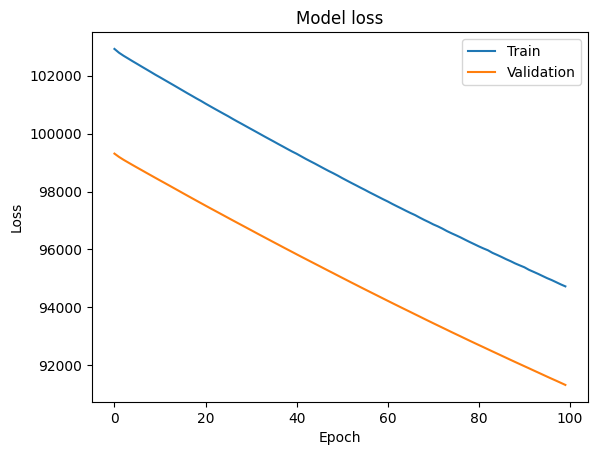

In [30]:
# Plot training & validation loss values
plt.plot(history_fe_model.history['loss'])
plt.plot(history_fe_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Feature Extraction using Tensorflow clone_model method

In [31]:
# Clone the pre-trained model
FE_model = tf.keras.models.clone_model(pre_trained_model)
FE_model.set_weights(pre_trained_model.get_weights())

# Freeze all layers except the last one in the cloned model
for layer in FE_model.layers[:-1]:
    layer.trainable = False

# Get the output of the second to last layer
x = FE_model.layers[-2].output

# Add the new last layer
new_output = tf.keras.layers.Dense(1, name="TrainableLayer")(x)

# Create a new model with the modified output
FE_model = tf.keras.models.Model(inputs=FE_model.input, outputs=new_output)

# Print the summary of the modified model
FE_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_input (InputLa  [(None, 6)]               0         
 yer)                                                            
                                                                 
 input_layer (Dense)         (None, 64)                448       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                           

Epoch 1/100
900/900 [==============================] - 3s 2ms/step - loss: 102950.7344 - mae: 73.4231 - val_loss: 99331.3984 - val_mae: 69.5885
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 102805.5469 - mae: 71.9283 - val_loss: 99203.9141 - val_mae: 68.0867
Epoch 3/100
900/900 [==============================] - 2s 2ms/step - loss: 102690.0000 - mae: 71.6342 - val_loss: 99098.3203 - val_mae: 67.7700
Epoch 4/100
900/900 [==============================] - 2s 2ms/step - loss: 102590.1875 - mae: 71.5865 - val_loss: 99004.3906 - val_mae: 67.6310
Epoch 5/100
900/900 [==============================] - 2s 2ms/step - loss: 102497.1250 - mae: 71.5701 - val_loss: 98914.2656 - val_mae: 67.5240
Epoch 6/100
900/900 [==============================] - 2s 3ms/step - loss: 102404.5312 - mae: 71.5023 - val_loss: 98826.0781 - val_mae: 67.4120
Epoch 7/100
900/900 [==============================] - 3s 3ms/step - loss: 102311.9922 - mae: 71.3911 - val_loss: 98736.8359 - val_mae: 

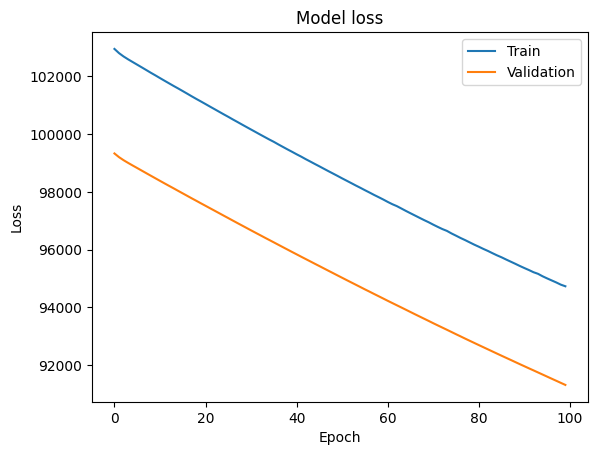

In [32]:
# Recompile the models
FE_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Fit the best model
history_FE_model = FE_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model
loss_FE_model, mae_FE_model = FE_model.evaluate(X_test_scaled, y_test)
print(f"Loss: {loss_FE_model:.3f}")
print(f"MAE: {mae_FE_model:.3f}")

# Plot training & validation loss values
plt.plot(history_FE_model.history['loss'])
plt.plot(history_FE_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Transfer Learning - Fine Tuning

## Cloning the pre-trained model


In [33]:
FT_model = tf.keras.models.clone_model(pre_trained_model)
FT_model.set_weights(pre_trained_model.get_weights())

## Freezing first half layers

In [34]:
# Calculate the number of layers to freeze (half of the layers)
num_layers = len(FT_model.layers)
num_layers_to_freeze = num_layers // 2

# Freeze half of the layers
for layer in FT_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

## Unfreezing last half layers


In [35]:
for layer in FT_model.layers[num_layers_to_freeze:]:
    layer.trainable = True

## Compiling and checking the model summary

In [36]:
# Compile the copied model
FT_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the summary of the modified model
FT_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                448       
                                                                 
 hidden_layer_1 (Dense)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 hidden_layer_3 (Dense)      (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

## Fitting the fine tuned model on USA dataset


In [37]:
history_FT_model = FT_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/100
900/900 [==============================] - 4s 3ms/step - loss: 94485.6562 - mae: 70.9252 - val_loss: 91067.8828 - val_mae: 63.9083
Epoch 2/100
900/900 [==============================] - 2s 2ms/step - loss: 94406.9688 - mae: 70.8819 - val_loss: 90998.8438 - val_mae: 64.2380
Epoch 3/100
900/900 [==============================] - 2s 2ms/step - loss: 94334.3672 - mae: 70.9700 - val_loss: 90925.8984 - val_mae: 63.8638
Epoch 4/100
900/900 [==============================] - 2s 2ms/step - loss: 94262.3281 - mae: 71.0475 - val_loss: 90860.7734 - val_mae: 64.0985
Epoch 5/100
900/900 [==============================] - 2s 2ms/step - loss: 94198.1094 - mae: 71.1017 - val_loss: 90798.0625 - val_mae: 64.8149
Epoch 6/100
900/900 [==============================] - 2s 2ms/step - loss: 94141.6406 - mae: 71.1389 - val_loss: 90716.5156 - val_mae: 63.9088
Epoch 7/100
900/900 [==============================] - 2s 2ms/step - loss: 94069.5938 - mae: 71.2115 - val_loss: 90652.3438 - val_mae: 64.5851

## Evaluating the fine tuned model



113/113 [==============================] - 0s 2ms/step - loss: 78149.4375 - mae: 62.3226
Loss: 78149.438
MAE: 62.323


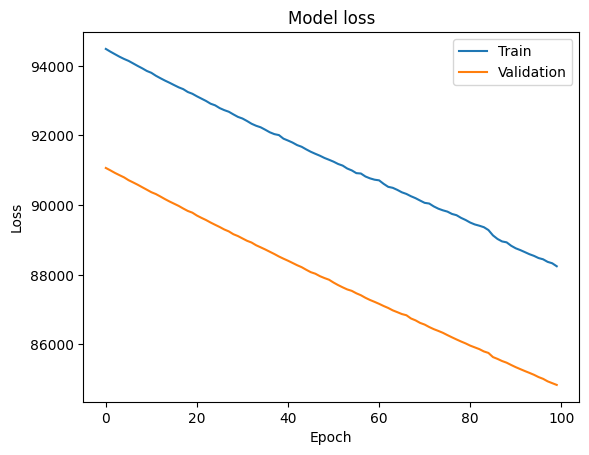

In [38]:
loss_FT_model, mae_FT_model = FT_model.evaluate(X_test_scaled, y_test)
print(f"Loss: {loss_FT_model:.3f}")
print(f"MAE: {mae_FT_model:.3f}")

# Plot training & validation loss values
plt.plot(history_FT_model.history['loss'])
plt.plot(history_FT_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Conclusion

- Pre-trained model: Test Loss = 83,898.148, Test MAE = 59.712

- Feature Extracted model: Test Loss = 84,066.969, Test MAE = 59.708

- Fine Tuned model: Test Loss = 78,149.438, Test MAE = 62.323